Набор данных, над которым мы будем работать, поступает от агентства онлайн-рекламы. Источник данных: https://www.kaggle.com/datasets/tbyrnes/advertising

Каждая строка в наборе данных представляет рекламу с меткой «Clicked on Ad», которая показывает, нажал ли зритель на рекламу.

Данные также включают более подробную информацию о зрителе рекламы, например, возраст и пол зрителя, количество времени, которое пользователь провел на сайте в этот день, и т. д.

Целью работы является проанализировать датасет и построить модель машинного обучения, которая в дальнейшем поможет магазину определить в каких ситуациях пользователь кликнет на рекламу.

__Импорт данных__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ROCAUC, ClassificationReport, ClassificationScoreVisualizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
warnings.simplefilter(action='ignore', category=FutureWarning)

__Загрузка датасета__

In [56]:
advert = pd.read_csv('advertising.csv')

__Получение информации о датасете__

In [3]:
print('Информация и столбцах датасета:')
advert.info()

Информация и столбцах датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
advert = advert.drop('Unnamed: 0', axis=1)

In [4]:
print('Размер датасета:', advert.shape[0], 'столбцов и', advert.shape[1], 'строк.')

Размер датасета: 1000 столбцов и 10 строк.


In [5]:
print('Пример датасета (первые пять строк)')
advert.head()

Пример датасета (первые пять строк)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
print('Пример датасета (последние пять строк)')
advert.tail()

Пример датасета (последние пять строк)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [7]:
advert.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
print('Доля дубликатов в данных составляет', advert.duplicated().sum() / len(advert), '%')

Доля дубликатов в данных составляет 0.0 %


In [9]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Данные имею 10 столбцов и 1000 наблюдений. Из десяти столбцов 4 являются численными, а 6 представляют собой категориальный тип данных. В данных отсутсвуют дубликаты. Также одна колонка "Timestamp" является категориальным признаком, однако содержит в себе дату. Изменим тип данных столбца и получим из него дополнительные данные для анализа. Интересно было бы посмотреть в какие месяца и какие дни недели было больше всего наблюдений и больше всего кликов на рекламу.

Среднее значение Clicked on Ad составляет 0.5 как и медианна - данные разбиты поровну на 0 и 1.

__Изучение зависимостей признаков и визуализация__

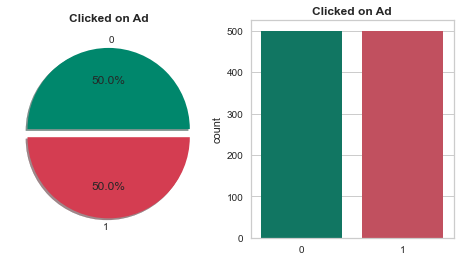

In [10]:
f,ax=plt.subplots(1,2,figsize=(8,4))
advert['Clicked on Ad'].value_counts().plot.pie(explode=[0,0.1],
                                                autopct='%1.1f%%',
                                                ax=ax[0],
                                                shadow=True, 
                                                colors=['#00876c','#d43d51'])
ax[0].set_title('Clicked on Ad', weight='bold')
ax[0].set_ylabel('')
sns.countplot('Clicked on Ad',
              data=advert,
              ax=ax[1], 
              palette =['#00876c','#d43d51'])
ax[1].set_title('Clicked on Ad', weight='bold')
ax[1].set_xlabel('')
plt.show()

Целевой признак распределен поровну между положительным и отрицательным классами.

In [11]:
advert['Timestamp'] = pd.to_datetime(advert['Timestamp']) 

In [12]:
advert['month'] = advert['Timestamp'].dt.month

advert['year'] = advert['Timestamp'].dt.year

advert['weekday'] = advert['Timestamp'].dt.weekday

advert['hour'] = advert['Timestamp'].dt.hour

In [13]:
advert['year'].value_counts()

2016    1000
Name: year, dtype: int64

Все данные представленя в рамках одного года, поэтому колонка year нам не нужна, удалим ее. Посмотрим распределение целевого признака по меясцам, дням недели а также часам

In [14]:
advert.drop(['year'], axis=1, inplace=True)

In [15]:
advert

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,month,weekday,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2,3,21
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,4,4,2
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2,0,17
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,3,3,2


In [16]:
# ProfileReport(advert)

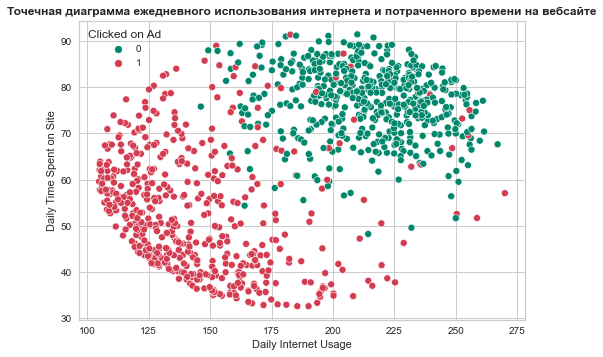

In [17]:
sns.scatterplot(data=advert, x="Daily Internet Usage", 
                y="Daily Time Spent on Site", 
                hue='Clicked on Ad', 
                palette =['#00876c','#d43d51'])
plt.title('Точечная диаграмма ежедневного использования интернета и потраченного времени на вебсайте', weight='bold')
plt.show()

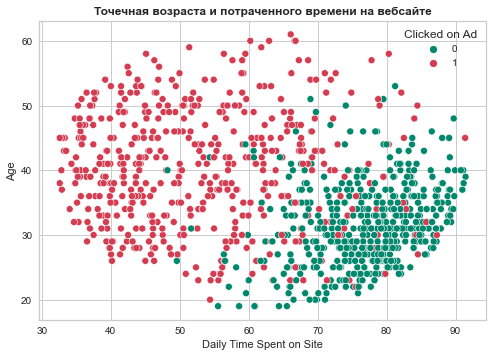

In [18]:
sns.scatterplot(data=advert, 
                x="Daily Time Spent on Site", 
                y="Age", 
                hue='Clicked on Ad',
                palette =['#00876c','#d43d51'])
plt.title('Точечная возраста и потраченного времени на вебсайте', weight='bold')
plt.show()

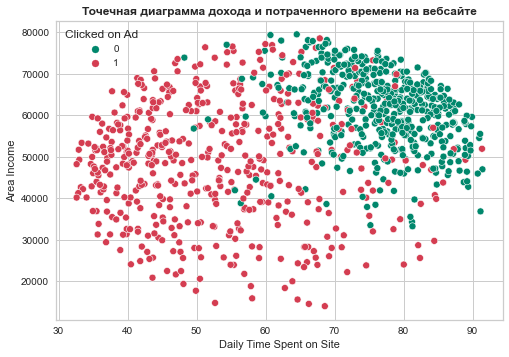

In [19]:
sns.scatterplot(data=advert, 
                x="Daily Time Spent on Site", 
                y="Area Income", 
                hue='Clicked on Ad', 
                palette =['#00876c','#d43d51'])
plt.title('Точечная диаграмма дохода и потраченного времени на вебсайте', weight='bold',)
plt.show()

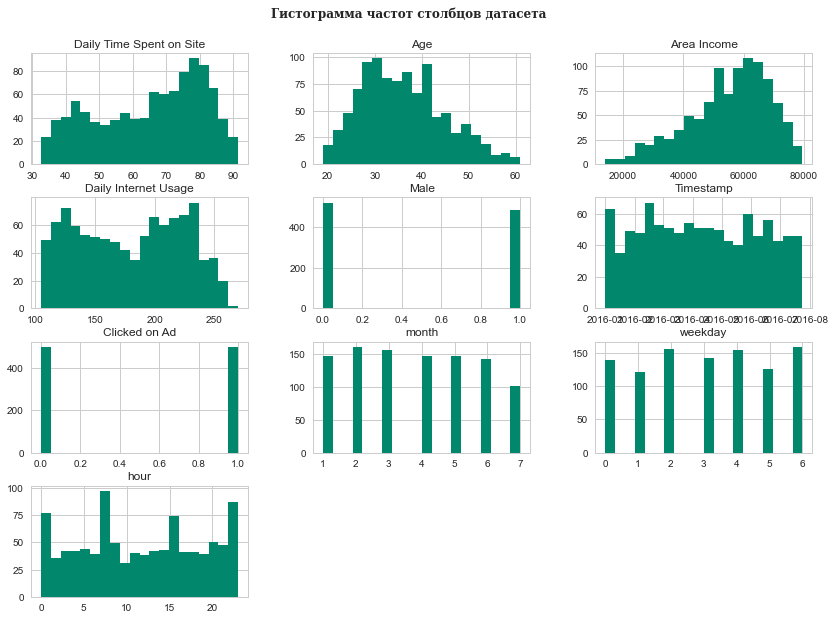

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

advert.hist(bins=20, figsize=(14,10), color='#00876c')
plt.figtext(0.5,0.93,"Гистограмма частот столбцов датасета", 
            family='Serif', 
            size=12, 
            weight='bold',
            ha='center')
plt.show()

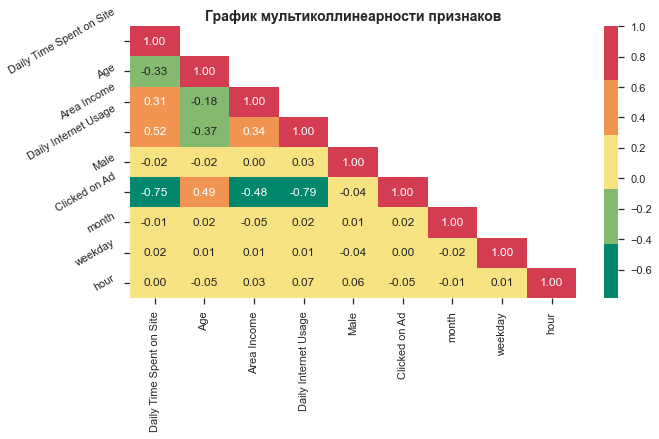

In [21]:
cols= ['#00876c','#85b96f','#f7e382','#f19452','#d43d51']
corr = advert.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,5))
plt.title('График мультиколлинеарности признаков', size=14, weight='bold')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f', cmap=cols)
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

На матрице видно, что количество кликов имеет довольно сильную отрицательную взаимосвязь с количеством времени, которое человек проводит на сайте и в Интернете.

То есть те, кто проводит на сайте больше времени, реже нажимают на рекламу. А также те, кто больше пользуется Интернетом, реже нажимают на рекламу.

Возраст и количество кликов имеют положительный коэффициент корреляции. Можно предположить, что более взрослое население чаще кликают на рекламу, чем молодое. Далее посмотрим на графике

In [22]:
print('Самый взрослый зритель:',advert['Age'].max(),'лет')
print('Самый молодой зритель:',advert['Age'].min(),'лет')
print('Средний возраст наблюдаемых:',np.round(advert['Age'].mean(), 1),'лет')

Самый взрослый зритель: 61 лет
Самый молодой зритель: 19 лет
Средний возраст наблюдаемых: 36.0 лет


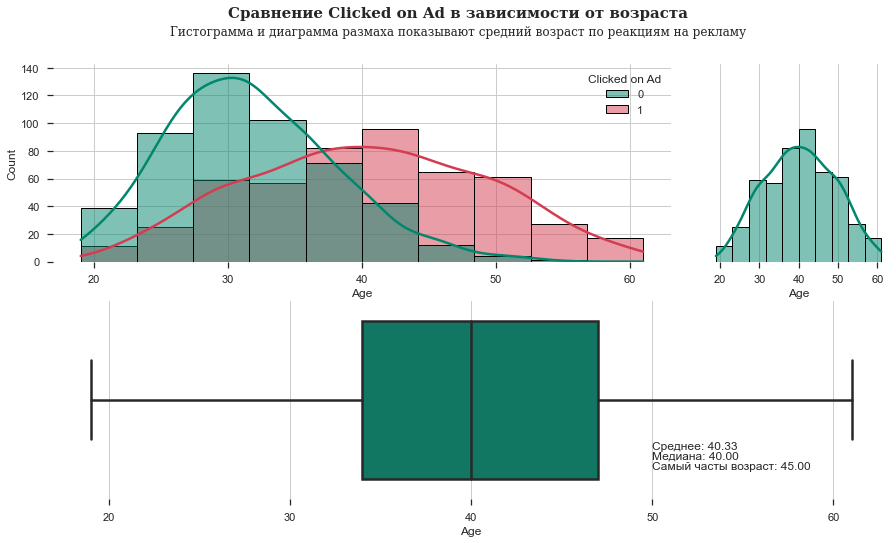

In [23]:
fig=plt.figure(figsize=(15,8), facecolor=(0.2,0.0,0.0,0.0), edgecolor='black')
plt.suptitle("Сравнение Clicked on Ad в зависимости от возраста", 
             family='Serif', 
             size=15,
             weight='bold')

plt.figtext(0.5,
            0.93,
            "Гистограмма и диаграмма размаха показывают средний возраст по реакциям на рекламу", 
            family='Serif', 
            size=12, 
            ha='center')
gs = GridSpec(nrows=2, 
              ncols=4, 
              figure=fig)
ax1=plt.subplot(gs[0,:3])


sns.histplot(data=advert, 
             x='Age', 
             bins=10, 
             ax=ax1, 
             kde=True, 
             hue='Clicked on Ad', 
             multiple='layer', 
             element='bars', 
             palette=['#00876c','#d43d51'])
ax2=plt.subplot(gs[0,3:4], 
                sharey=ax1)
sns.histplot(data=advert[advert['Clicked on Ad']==1], 
             x='Age', 
             bins=10, 
             ax=ax2, 
             kde=True, 
             color=['#00876c']);
ax2.yaxis.set_visible(False)



ax4=plt.subplot(gs[1,:4])
sns.boxplot(data=advert[advert['Clicked on Ad']==1], 
            x='Age', 
            ax=ax4, 
            palette=['#00876c']);
ax4.yaxis.set_visible(False)
ax4.text(50,0.25,"Среднее: {:.2f}".format(advert[advert['Clicked on Ad']==1]['Age'].mean()))
ax4.text(50,0.30,"Медиана: {:.2f}".format(advert[advert['Clicked on Ad']==1]['Age'].median()))
ax4.text(50,0.35,"Самый часты возраст: {:.2f}".format(advert[advert['Clicked on Ad']==1]['Age'].mode().max()))
for i in ['left','right','bottom','top']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)

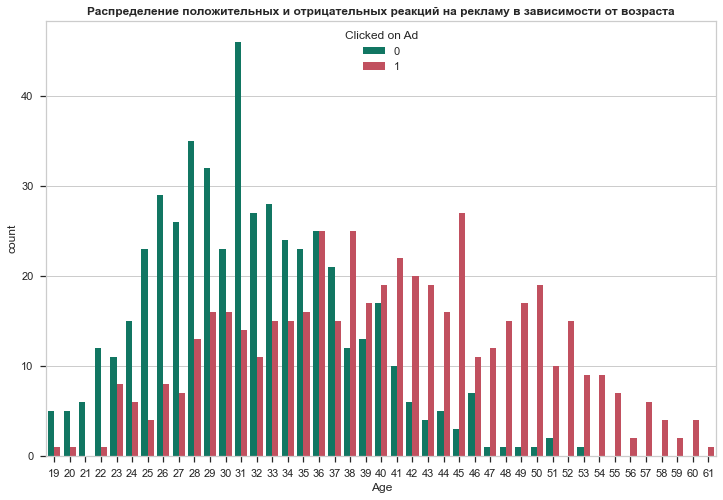

In [24]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=advert,
              x='Age',
              hue='Clicked on Ad', 
              palette=['#00876c','#d43d51'])
plt.title('Распределение положительных и отрицательных реакций на рекламу в зависимости от возраста', 
          weight='bold')
plt.show()

Из графика видим, что чем взрослее население тем более вероятно то, что они кликнут на рекламу. Люди до 35 лет скорее не кликают на рекламу, чем кликают. А после 35 лет ситуация противоположная. Такую зависимость подвреждает матрица корреляции. Коэффициент корелляции между двумя этими показателями равен 0.49. 

In [25]:
print('Количество уникальных стран:', advert['Country'].nunique())
print('больше всего наблюдений содержится в следующих странах:')
print(advert['Country'].value_counts().head(15))

Количество уникальных стран: 237
больше всего наблюдений содержится в следующих странах:
France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Senegal           8
Liberia           8
Australia         8
South Africa      8
Micronesia        8
Cyprus            8
Afghanistan       8
Taiwan            7
Cambodia          7
Luxembourg        7
Name: Country, dtype: int64


Данные содержат 237 уникальных стран, больше всего наблюдений из Франции - 9, а это меньше 0,9% от всех наблюдений. посмотрим как распределился целевой признак по странам.

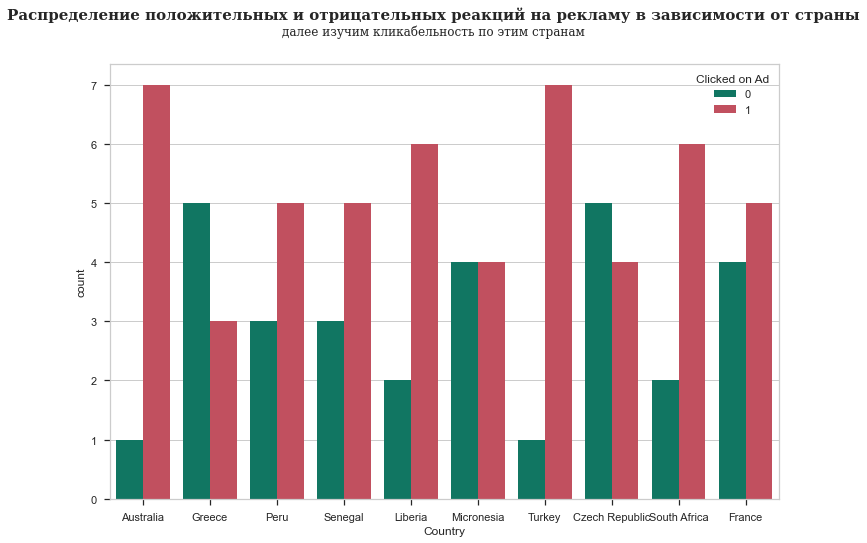

In [26]:
fig=plt.figure(figsize=(12,8))
sns.countplot(data=advert[advert['Country'].isin(advert['Country'].value_counts().head(10).index)],
              x='Country',hue='Clicked on Ad', 
              palette=['#00876c','#d43d51'])
plt.suptitle('Распределение положительных и отрицательных реакций на рекламу в зависимости от страны', 
          family='Serif', size=15, ha='center', weight='bold')

plt.figtext(0.5,0.93,"далее изучим кликабельность по этим странам", family='Serif', size=12, ha='center')
plt.show()

In [27]:
ctr = np.round((advert[advert['Country'].isin(\
    advert['Country'].value_counts().head(10).index)].groupby('Country')['Clicked on Ad'].sum() / \
advert[advert['Country'].isin(\
    advert['Country'].value_counts().head(10).index)].groupby('Country')['Clicked on Ad'].count()) * 100, 1).to_frame().reset_index()

In [28]:
ctr = ctr.rename(columns = {'Clicked on Ad': 'Click Through Rate, %'})
ctr.sort_values('Click Through Rate, %', ascending=False)

,Country,"Click Through Rate, %"
0,Australia,87.5
9,Turkey,87.5
4,Liberia,75.0
8,South Africa,75.0
6,Peru,62.5
7,Senegal,62.5
2,France,55.6
5,Micronesia,50.0
1,Czech Republic,44.4
3,Greece,37.5


Больше всего наблюдений во **Франции и Чехии**, однако самая высокая кликабельность наблюдается в **Австралии и Турции** - `87,5%`. В этих странах представлено 8 наблюдений и только в одном случае из восьми пользователь **не** кликнул на рекламу.

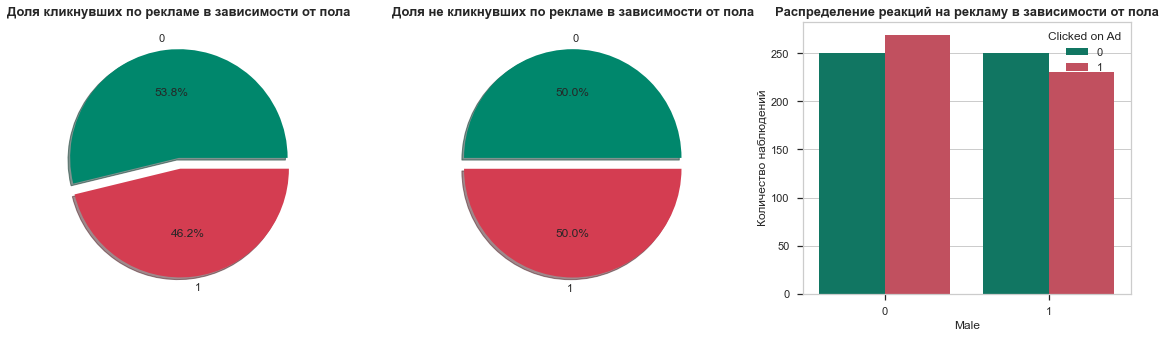

In [29]:
f,ax=plt.subplots(1,3,figsize=(20,5))
advert[advert['Clicked on Ad'] == 1]['Male'].value_counts().plot.pie(explode=[0,0.1],
                                                autopct='%1.1f%%',
                                                ax=ax[0],
                                                shadow=True, 
                                                colors=['#00876c','#d43d51'])
ax[0].set_title('Доля кликнувших по рекламе в зависимости от пола', size=13, weight='bold')
ax[0].set_ylabel('')


advert[advert['Clicked on Ad'] == 0]['Male'].value_counts().plot.pie(explode=[0,0.1],
                                                autopct='%1.1f%%',
                                                ax=ax[1],
                                                shadow=True, 
                                                colors=['#00876c','#d43d51'])
ax[1].set_title('Доля не кликнувших по рекламе в зависимости от пола', size=13, weight='bold')
ax[1].set_ylabel('')


sns.countplot('Male',
              hue='Clicked on Ad',
              data=advert,
              ax=ax[2], 
              palette =['#00876c','#d43d51'])
ax[2].set_title('Распределение реакций на рекламу в зависимости от пола', 
                size=13, 
                weight='bold')
ax[2].set_ylabel('Количество наблюдений')

plt.show()

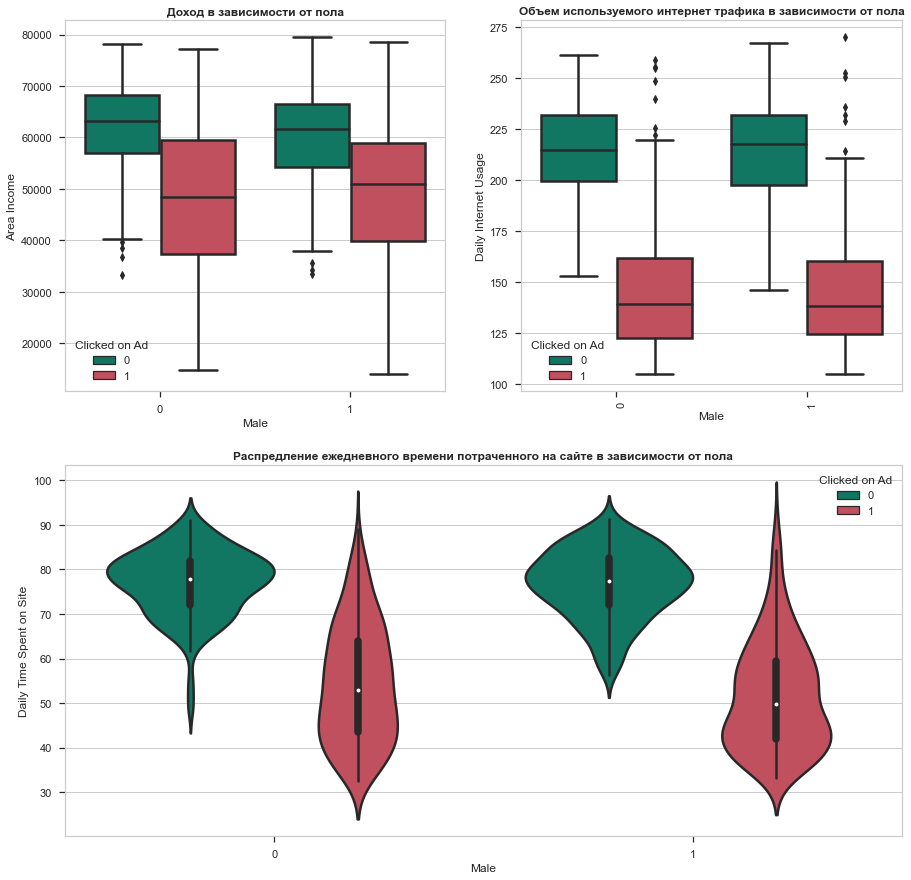

In [30]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="Male", y="Area Income", hue="Clicked on Ad",
                    data=advert, palette=['#00876c','#d43d51'], ax=ax1)

g.set_title("Доход в зависимости от пола", weight='bold')

g1 = sns.boxplot(x="Male", y="Daily Internet Usage", hue="Clicked on Ad",
                 data=advert, palette=['#00876c','#d43d51'], ax=ax2)

g1.set_xticklabels(advert["Male"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Объем используемого интернет трафика в зависимости от пола", weight='bold')

g2 = sns.violinplot(data=advert, x="Male", y="Daily Time Spent on Site", hue="Clicked on Ad", palette=['#00876c','#d43d51'])

g2.set_title("Распредление ежедневного времени потраченного на сайте в зависимости от пола", weight='bold')


plt.show()

Если смотреть на количество наблюдений в целом, то женщины составляют `51,9%`, то есть женщин на 38 больше, чем мужщин. Женщины и мужщины одинакого не кликают на рекламу, соответсвенно женщины больше кликают на 38. Так как данные распределены не равномерно нельзя утверждать, что женщины вероятнее кликнет на рекламу, чем мужчина. 

Проверим на графике действительно ли количество кликов имеет довольно сильную отрицательную взаимосвязь с количеством времени, которое человек проводит на сайте и в Интернете.

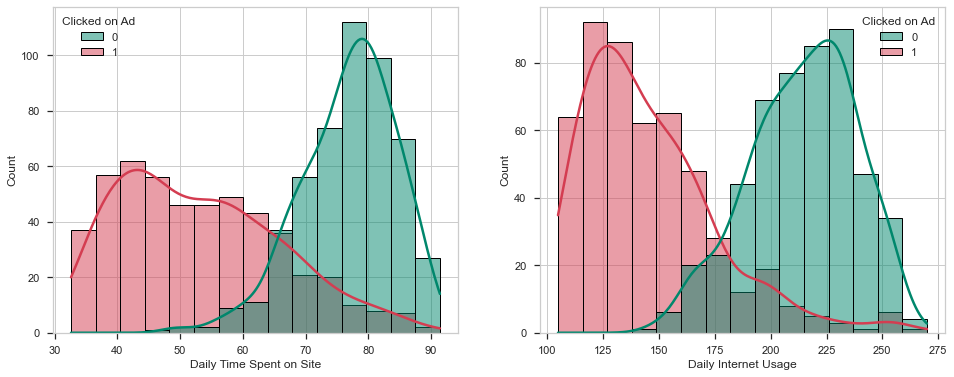

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=advert, 
             x='Daily Time Spent on Site', 
             bins=15, 
             kde=True, 
             hue='Clicked on Ad', 
             ax=axs[0], 
             palette=['#00876c','#d43d51'])
sns.histplot(data=advert, 
             x='Daily Internet Usage', 
             bins=15, 
             kde=True, 
             hue='Clicked on Ad', 
             ax=axs[1], 
             palette=['#00876c','#d43d51'])

plt.show()

Действительно чем больше человек сидит на сайте и в интернете в приципе, тем менее вероятно то, что он кликнет на рекламу. Возможно в начале его нахождения в сети еще и присутсвует интерес к рекламе, он переходит и смотрит, а в дальнейшем уже не обращает внимание, так как занят тем за чем зашел в интернет/сайт

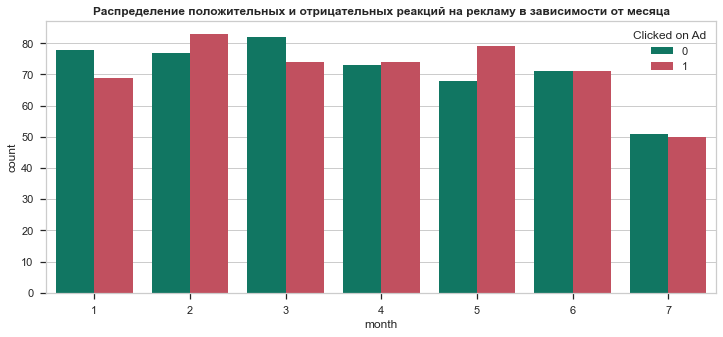

In [32]:
fig=plt.figure(figsize=(12,5))
sns.countplot(data=advert,x='month',hue='Clicked on Ad', palette=['#00876c','#d43d51'])
plt.title('Распределение положительных и отрицательных реакций на рекламу в зависимости от месяца', weight='bold')
plt.show()

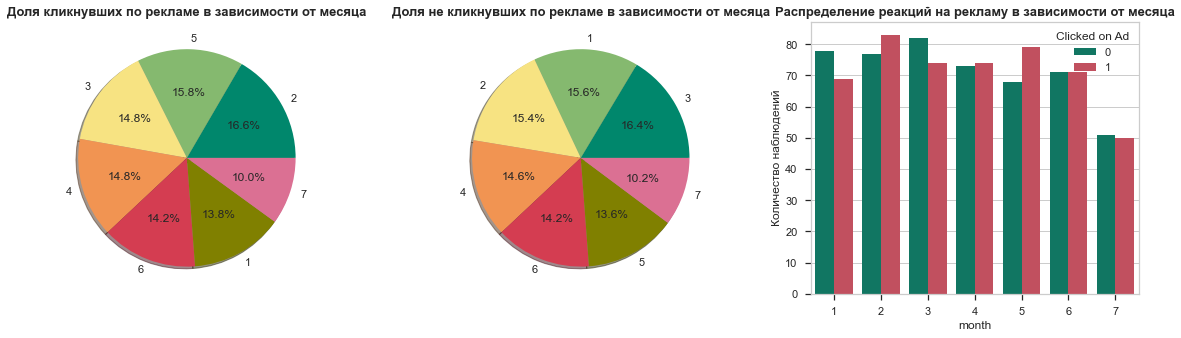

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,5))
advert[advert['Clicked on Ad'] == 1]['month'].value_counts().plot.pie(
                                                autopct='%1.1f%%',
                                                ax=ax[0],
                                                shadow=True, 
                                                colors=['#00876c', '#85b96f',
                                                        '#f7e382', '#f19452',
                                                        '#d43d51', '#808000', 
                                                        '#DB7093'])
ax[0].set_title('Доля кликнувших по рекламе в зависимости от месяца', size=13, weight='bold')
ax[0].set_ylabel('')


advert[advert['Clicked on Ad'] == 0]['month'].value_counts().plot.pie(
                                                autopct='%1.1f%%',
                                                ax=ax[1],
                                                shadow=True, 
                                                colors=['#00876c', '#85b96f',
                                                        '#f7e382', '#f19452',
                                                        '#d43d51', '#808000', 
                                                        '#DB7093'])
ax[1].set_title('Доля не кликнувших по рекламе в зависимости от месяца', size=13, weight='bold')
ax[1].set_ylabel('')


sns.countplot('month',
              hue='Clicked on Ad',
              data=advert,
              ax=ax[2], 
              palette =['#00876c','#d43d51'])
ax[2].set_title('Распределение реакций на рекламу в зависимости от месяца', 
                size=13, 
                weight='bold')
ax[2].set_ylabel('Количество наблюдений')

plt.show()

In [34]:
ctr = np.round((advert.groupby('month')['Clicked on Ad'].sum() / \
advert.groupby('month')['Clicked on Ad'].count()) * 100, 1).to_frame().reset_index()

ctr.sort_values('Clicked on Ad', ascending=False)

,month,Clicked on Ad
4,5,53.7
1,2,51.9
3,4,50.3
5,6,50.0
6,7,49.5
2,3,47.4
0,1,46.9


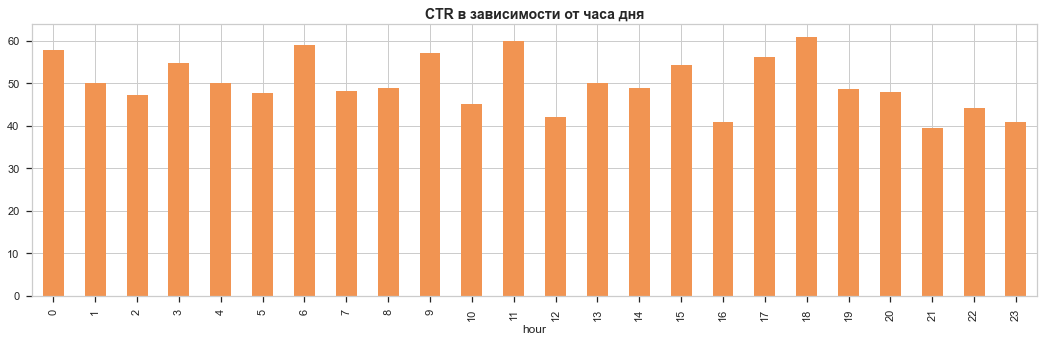

In [35]:
plt.figure(figsize=(18,5))
np.round((advert.groupby('hour')['Clicked on Ad'].sum() / \
advert.groupby('hour')['Clicked on Ad'].count()) * 100, 1).plot(kind='bar', color='#f19452')
plt.title('CTR в зависимости от часа дня', 
          weight='bold', size=14)
plt.show()


Cамый кликабельный месяц был май. А самое кликабельное время - 18 вечера. Также высокий показатель наблюдается в 11 дня и 6 утра.

__Кодирование категориальных переменных__

In [36]:
le = LabelEncoder()
advert_coder = advert.copy()
for cat_var in ['Age', 'Ad Topic Line', 'City', 'Male', 'Country']:
    advert_coder[cat_var] = le.fit_transform(advert_coder[cat_var]) 

__Определение признаков и целевого признака__

In [37]:
X=advert_coder.drop(['Clicked on Ad', 'Timestamp'], axis=1)
y=advert_coder['Clicked on Ad']

__Разделение данных на обучающую и тестовую выборки__

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

__Стандартизация числовых признаков__

In [39]:
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,month,weekday,hour
0,68.95,16,61833.90,256.09,91,961,0,215,3,6,0
1,80.23,12,68441.85,193.77,464,903,1,147,4,0,1
2,69.47,7,59785.94,236.50,566,111,0,184,3,6,20
3,74.15,10,54806.18,245.89,903,939,1,103,1,6,2
4,68.37,16,73889.99,225.58,766,805,0,96,6,4,3


__Уравнение логистической регрессии__

$$
y = ln(Odds) = ln(\frac{p}{1 - p}) = \beta_0 + \beta_1 \cdot x_1 + ... + = \beta_k \cdot x_k 
$$

__Построение модели логистической регрессии__

In [41]:
# Логистическая регрессия
model = LogisticRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)
y_pred_probs = model.predict_proba(X_test)
print(f'Accuracy логистической регрессии: {np.round(accuracy_score(y_test,pred) * 100, 1)} %')

Accuracy логистической регрессии: 96.3 %


__Получение метрик качества логистической регрессии__

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



__Коэффициенты логистической регрессии__

In [43]:
coef = pd.DataFrame({'Coefs' : model.coef_[0],
                    'Names' : X.columns.to_list()})
coef = coef.append({'Coefs' : model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)

In [44]:
coef

,Coefs,Names
0,-2.549979,Daily Time Spent on Site
1,1.324758,Age
2,-1.605273,Area Income
3,-2.823797,Daily Internet Usage
4,0.228613,Ad Topic Line
5,-0.320883,City
6,-0.291859,Male
7,-0.144756,Country
8,0.242299,month
9,0.252538,weekday


In [45]:
y_test.value_counts()

1    154
0    146
Name: Clicked on Ad, dtype: int64

In [46]:
model.intercept_[0]

1.501821895140218

__Roc-Auc кривая__

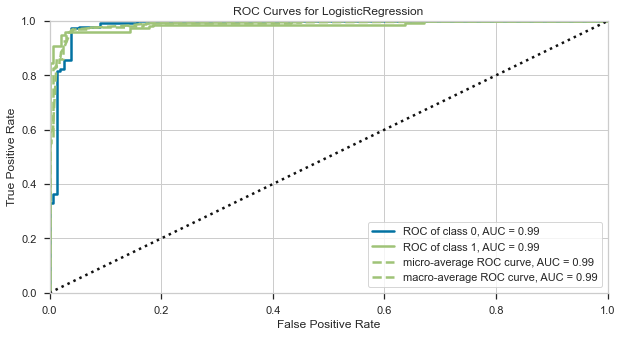

In [47]:
plt.figure(figsize=(10,5))
visualizer = ROCAUC(model, classes=[0, 1])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)   
visualizer.show() 
plt.show()
# https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

__Матрица ошибок__

In [48]:
confusion_matrix_ = confusion_matrix(y_test, pred)
print(confusion_matrix_)

[[142   4]
 [  7 147]]


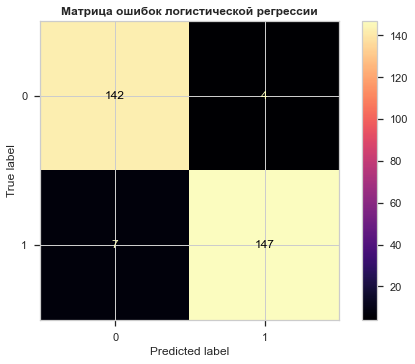

In [49]:
cm = confusion_matrix(y_test, 
                      pred, 
                      labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap='magma')
plt.title('Матрица ошибок логистической регрессии', 
          weight='bold')
plt.show()
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

У нас 142+132 верных и 22+4 неверных прогнозов. Модель больше склонна видеть отрицательные ответы там, где их нет. - ошибка второго рода.

__Построение модели наивный Байесовский классификатор__

In [50]:
#Наивный Байесовский классификатор
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

prediction = naive_model.predict(X_test)
print(f'Accuracy наивного байесовского классификатора: {np.round(accuracy_score(y_test,prediction) * 100, 1)} %')

Accuracy наивного байесовского классификатора: 96.0 %


# Итог

Был изучен датасет показывающий характеристики пользователя и его реакцию на рекламу - нажал или нет. Данные представляют из себя сет из 10 столбцов и 1000 строк. В ходе изучения не было найдено дубликатов, пропусков, а также выбросов.

При изучении зависимостей между столбцами выяснили, что количество кликов имеет довольно сильную отрицательную взаимосвязь с количеством времени, которое человек проводит на сайте и в Интернете - те, кто проводит на сайте больше времени, реже нажимают на рекламу, а также те, кто больше пользуется Интернетом, реже нажимают на рекламу.

Возраст и количество кликов имеют положительный коэффициент корреляции. Более взрослое население чаще кликают на рекламу, чем молодое. 

Из 1000 наблюдений в данных представлено 237 стран. Самыми кликабельными странами оказались Австралия и Турция - в них по 8 наблюдений. А Франция и Чехия имеют больше всего наблюдений, а именно - 9.

Самый кликабельный месяц - май, а час - 18.00.

На основе данных была построена модель логистической регрессии с показателем accuracy 96%. также для сравнения был построен наивный байесовский классфикатор с аналогичной метрикой в 50%. Самые значимые коэффициенты в модели логистической регресси оказались время потраченное в интернете и на сайте.

Исходя из матрицы ошибок можно сделать вывод, что модель больше склонна видеть отрицательные ответы там, где их нет, а это ошибка второго рода.